In [2]:
from ted_sim import *

In [3]:
def e_max(energies):
    return np.max(np.abs(energies - energies[0]))

In [4]:
dts = np.logspace(-4, -2, 5)
print(dts)

time = 2
drifts = []
noises = []
e_maxs = []

for dt in dts:
    sim = LJParticles(N=16, L=10.0, temperature=1.0, dt=dt)
    steps = int(time / dt)
    energies = np.zeros(steps + 1)
    times = np.linspace(0, time, steps + 1)

    energies[0] = sim.potential_energy + sim.kinetic_energy

    for i in range(steps):
        sim.step()
        energies[i+1] = sim.potential_energy + sim.kinetic_energy

    e_maxs.append(e_max(energies))
    A = np.vstack([times, np.ones_like(times)]).T
    slope, intercept = np.linalg.lstsq(A, energies, rcond=None)[0]
    fitted = slope * times + intercept
    noise = np.sqrt(np.mean((energies - fitted)**2))

    drifts.append(abs(slope))
    noises.append(noise)

[0.0001     0.00031623 0.001      0.00316228 0.01      ]


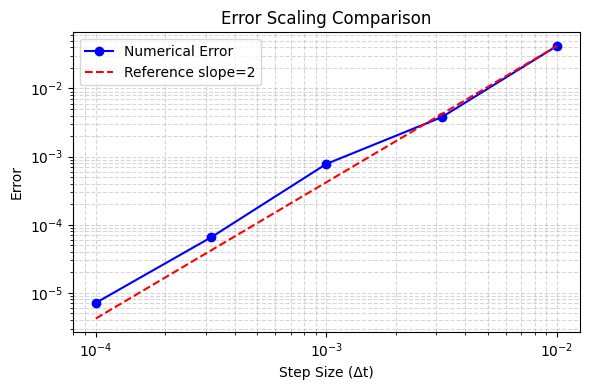

In [4]:
plt.figure(figsize=(6, 4))

plt.loglog(dts, e_maxs, 'bo-', label='Numerical Error')

slope = 2
ref_dt = np.array([dts[0], dts[-1]])
ref_error = e_maxs[-1] * (ref_dt / dts[-1])**slope
plt.loglog(ref_dt, ref_error, 'r--', label=f'Reference slope={slope}')

plt.xlabel('Step Size (Δt)')
plt.ylabel('Error')
plt.title('Error Scaling Comparison')
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

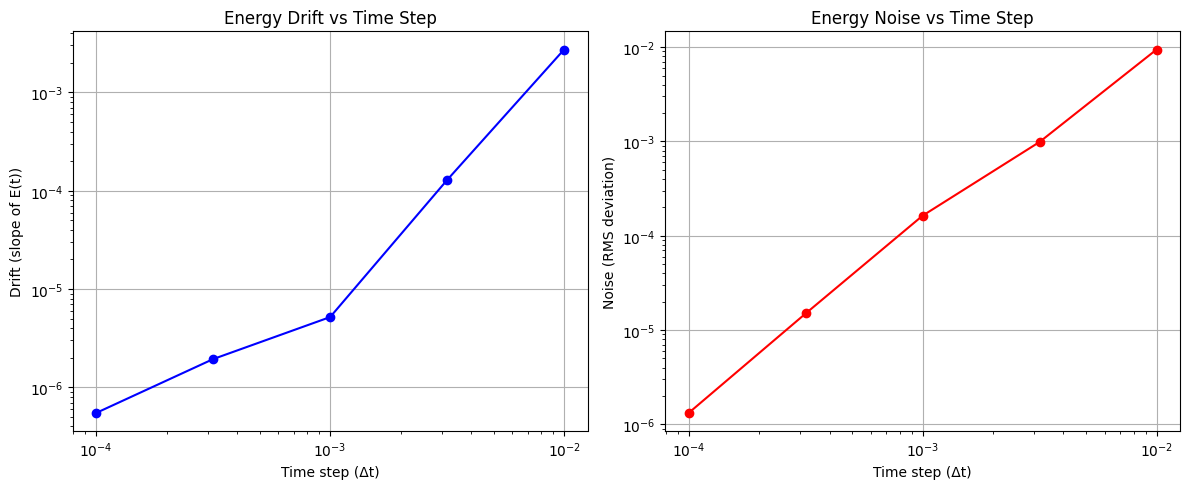

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(dts, drifts, 'bo-')
plt.xlabel('Time step (Δt)')
plt.ylabel('Drift (slope of E(t))')
plt.title('Energy Drift vs Time Step')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(dts, noises, 'ro-')
plt.xlabel('Time step (Δt)')
plt.ylabel('Noise (RMS deviation)')
plt.title('Energy Noise vs Time Step')
plt.grid(True)

plt.tight_layout()
plt.show()

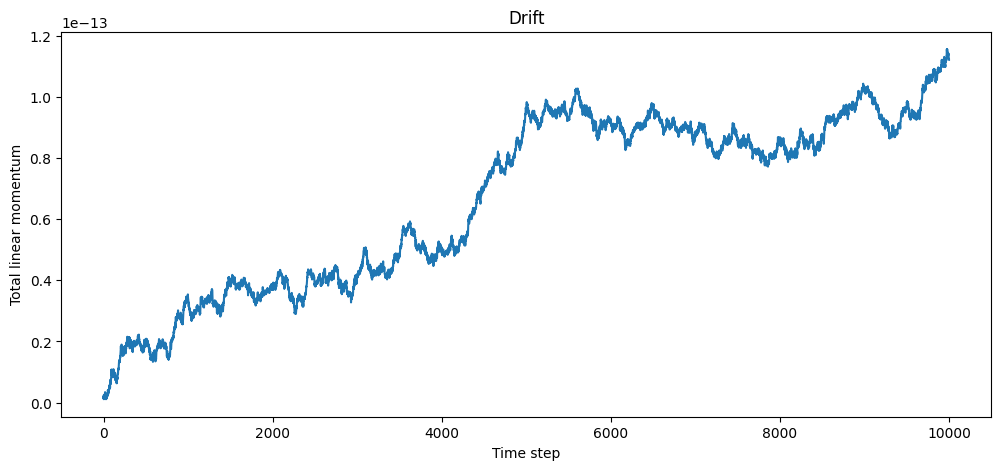

In [6]:
sim = LJParticles(N=16, L=10.0, temperature=1.0, dt=0.01, seed=57)
steps = 10000
lin_momentum = np.zeros(steps)

for i in range(steps):
    sim.step()
    lin_momentum[i] = np.sqrt(np.sum(sim.vx)**2 + np.sum(sim.vy)**2)

plt.figure(figsize=(12, 5))
plt.plot(lin_momentum)
plt.xlabel("Time step")
plt.ylabel("Total linear momentum")
plt.title("Drift")
plt.show()

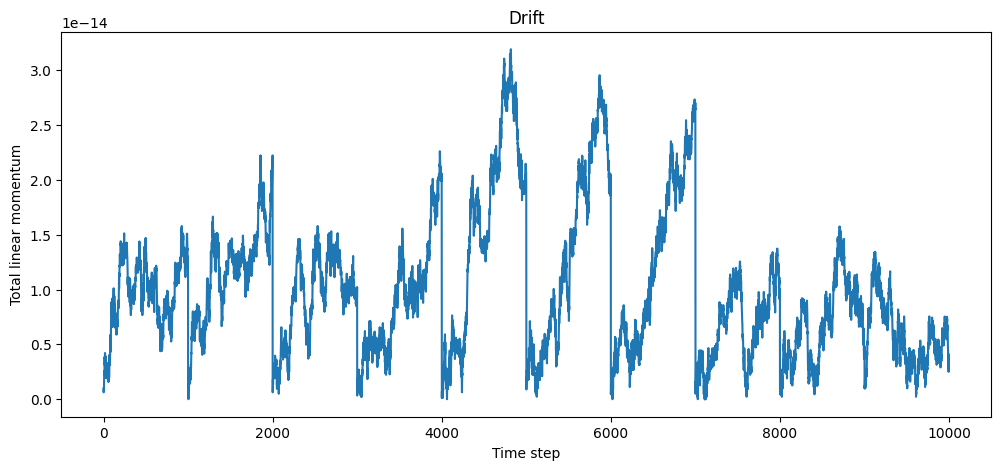

In [7]:
sim = LJParticles(N=16, L=10.0, temperature=1.0, dt=0.01, seed=57)
steps = 10000
lin_momentum = np.zeros(steps)

for i in range(steps):
    sim.step()

    if i % 1000 == 0:
        sim.vx -= np.mean(sim.vx)
        sim.vy -= np.mean(sim.vy)

    lin_momentum[i] = np.sqrt(np.sum(sim.vx)**2 + np.sum(sim.vy)**2)

plt.figure(figsize=(12, 5))
plt.plot(lin_momentum)
plt.xlabel("Time step")
plt.ylabel("Total linear momentum")
plt.title("Drift")
plt.show()

In [11]:
from ted_sim import *

sim = LJParticles(N=64, L=12.0, temperature=2.0, dt=0.01, seed=57)
steps = 20000

temps = 0.0
virials = 0.0

for i in range(steps):
    sim.step()
    temps += sim.get_temperature()
    virials += sim.virial

mean_temp = temps / steps
mean_virial = virials / steps

pressure = 1.0 + 0.5 * (mean_virial / (sim.N * mean_temp))

In [12]:
print(pressure)

1.6434686731919963
